COMPREHENSIVE ANALYSIS OF HAROLD SHIPMAN VICTIMS
USING REAL TIME-OF-DAY DATA
Dataset loaded: 215 victims
Columns available: ['DateofDeath', 'Name', 'Age', 'PlaceofDeath', 'Decision', 'yearOfDeath', 'gender', 'fractionalDeathYear', 'ageBracket', 'gender2', 'Hour', 'HourOfDay', 'Minute', 'DayOfWeek', 'DayOfWeekNum', 'Month', 'Season', 'AgeCategory', 'Year']

REAL TIME PATTERN ANALYSIS


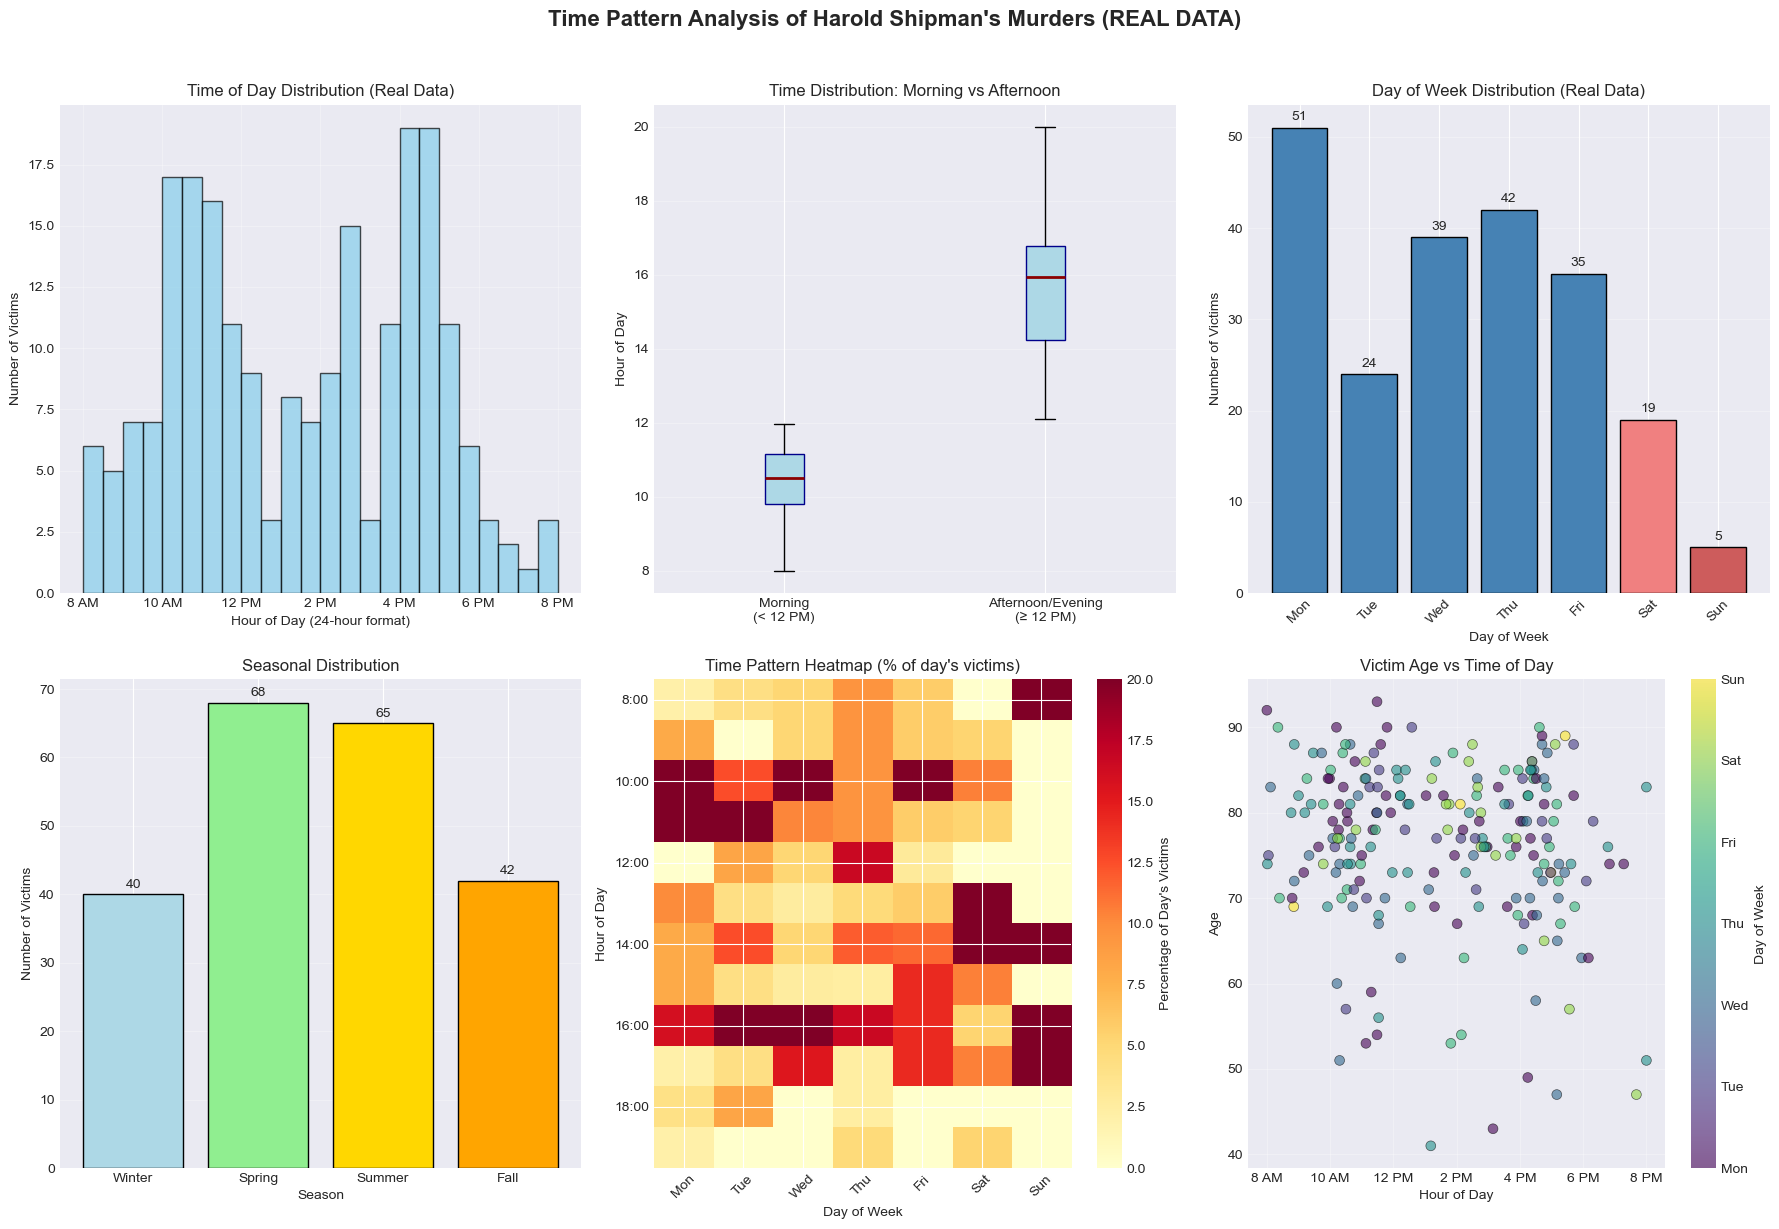


REAL DATA STATISTICS

1. TIME OF DAY ANALYSIS (REAL DATA):
----------------------------------------
Total victims: 215

Morning victims (before 12 PM): 86 (40.0%)
Afternoon victims (12 PM - 6 PM): 120 (55.8%)
Evening victims (after 6 PM): 9 (4.2%)

Peak hour: 16:00 (38 victims)
Most active hours (≥ 19 victims):
  10:00 - 34 victims
  11:00 - 27 victims
  14:00 - 24 victims
  16:00 - 38 victims

Time range: 8.0 to 20.0 hours
Mean time: 13.5 hours
Median time: 13.7 hours

2. DAY OF WEEK ANALYSIS (REAL DATA):
----------------------------------------
Monday      :  51 victims ( 23.7%)
Tuesday     :  24 victims ( 11.2%)
Wednesday   :  39 victims ( 18.1%)
Thursday    :  42 victims ( 19.5%)
Friday      :  35 victims ( 16.3%)
Saturday    :  19 victims (  8.8%)
Sunday      :   5 victims (  2.3%)

Weekday victims (Mon-Fri): 191 (88.8%)
Weekend victims (Sat-Sun): 24 (11.2%)

3. KEY FINDINGS FROM REAL DATA:
----------------------------------------
Based on the ACTUAL time data:
• Earliest murder 

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("=" * 70)
print("COMPREHENSIVE ANALYSIS OF HAROLD SHIPMAN VICTIMS")
print("USING REAL TIME-OF-DAY DATA")
print("=" * 70)

# Read YOUR data file (not the URL)
df = pd.read_csv('C:\\GitHub-RyanHabis.io repo\\RyanHabis.github.io\\portfolio\\shipman-analysis\\data\\shipman_victims_with_time_data.csv')

print(f"Dataset loaded: {len(df)} victims")
print(f"Columns available: {list(df.columns)}")

# Convert DateofDeath to datetime
df['DateofDeath'] = pd.to_datetime(df['DateofDeath'], format='%d-%b-%y')

# Create proper datetime from Hour and Minute
def create_datetime(row):
    hour = int(row['Hour'])
    minute = int((row['Hour'] - hour) * 60)
    # Use DateofDeath for date part, hour/minute for time part
    return datetime(row['DateofDeath'].year, row['DateofDeath'].month, 
                    row['DateofDeath'].day, hour, minute)

df['DateTime'] = df.apply(create_datetime, axis=1)

# Ensure categorical order
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['DayOfWeek'] = pd.Categorical(df['DayOfWeek'], categories=days, ordered=True)

seasons_order = ['Winter', 'Spring', 'Summer', 'Fall']
df['Season'] = pd.Categorical(df['Season'], categories=seasons_order, ordered=True)

# Age categories
df['AgeCategory'] = pd.cut(df['Age'], 
                           bins=[0, 60, 70, 80, 90, 100],
                           labels=['<60', '60-69', '70-79', '80-89', '90+'])

# ============================================================================
# REAL DATA ANALYSIS - NO SIMULATION NEEDED
# ============================================================================
print("\n" + "=" * 70)
print("REAL TIME PATTERN ANALYSIS")
print("=" * 70)

# Create figure for time patterns
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Time Pattern Analysis of Harold Shipman\'s Murders (REAL DATA)', 
             fontsize=16, fontweight='bold', y=1.02)

# 1. Time of Day Distribution (Histogram)
ax1 = axes[0, 0]
n_bins = 24
ax1.hist(df['Hour'], bins=n_bins, color='skyblue', edgecolor='black', alpha=0.7)
ax1.set_xlabel('Hour of Day (24-hour format)')
ax1.set_ylabel('Number of Victims')
ax1.set_title('Time of Day Distribution (Real Data)')
ax1.grid(True, alpha=0.3)
ax1.set_xticks([8, 10, 12, 14, 16, 18, 20])
ax1.set_xticklabels(['8 AM', '10 AM', '12 PM', '2 PM', '4 PM', '6 PM', '8 PM'])

# 2. Time of Day Distribution (Box Plot)
ax2 = axes[0, 1]
box_data = [df['Hour'][df['Hour'] < 12], 
            df['Hour'][df['Hour'] >= 12]]
ax2.boxplot(box_data, labels=['Morning\n(< 12 PM)', 'Afternoon/Evening\n(≥ 12 PM)'],
            patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='darkblue'),
            medianprops=dict(color='darkred', linewidth=2))
ax2.set_ylabel('Hour of Day')
ax2.set_title('Time Distribution: Morning vs Afternoon')
ax2.grid(True, alpha=0.3, axis='y')

# 3. Day of Week Distribution
ax3 = axes[0, 2]
day_counts = df['DayOfWeek'].value_counts().sort_index()
colors = ['steelblue'] * 5 + ['lightcoral', 'indianred']
bars = ax3.bar(range(len(days)), day_counts.values, color=colors, edgecolor='black')
ax3.set_xlabel('Day of Week')
ax3.set_ylabel('Number of Victims')
ax3.set_title('Day of Week Distribution (Real Data)')
ax3.set_xticks(range(len(days)))
ax3.set_xticklabels([d[:3] for d in days], rotation=45)
ax3.grid(True, alpha=0.3, axis='y')

# Add value labels
for bar, count in zip(bars, day_counts.values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{count}', ha='center', va='bottom')

# 4. Season Distribution
ax4 = axes[1, 0]
season_counts = df['Season'].value_counts().sort_index()
colors_seasons = ['lightblue', 'lightgreen', 'gold', 'orange']
bars_season = ax4.bar(season_counts.index, season_counts.values, 
                      color=colors_seasons, edgecolor='black')
ax4.set_xlabel('Season')
ax4.set_ylabel('Number of Victims')
ax4.set_title('Seasonal Distribution')
ax4.grid(True, alpha=0.3, axis='y')

for bar, count in zip(bars_season, season_counts.values):
    height = bar.get_height()
    ax4.text(bar.get_x() + bar.get_width()/2., height + 0.5,
             f'{count}', ha='center', va='bottom')

# 5. Time of Day Heatmap by Day of Week
ax5 = axes[1, 1]
hour_bins = pd.cut(df['Hour'], bins=np.arange(8, 21, 1))
heatmap_data = pd.crosstab(df['DayOfWeek'], hour_bins, normalize='index') * 100
heatmap_data = heatmap_data.reindex(days)

im = ax5.imshow(heatmap_data.T, aspect='auto', cmap='YlOrRd', vmin=0, vmax=20)
ax5.set_xlabel('Day of Week')
ax5.set_ylabel('Hour of Day')
ax5.set_title('Time Pattern Heatmap (% of day\'s victims)')
ax5.set_xticks(range(len(days)))
ax5.set_xticklabels([d[:3] for d in days], rotation=45)
ax5.set_yticks(range(0, len(hour_bins.cat.categories), 2))
ax5.set_yticklabels([f'{h+8}:00' for h in range(0, len(hour_bins.cat.categories), 2)])

cbar = plt.colorbar(im, ax=ax5)
cbar.set_label('Percentage of Day\'s Victims')

# 6. Time vs Age Scatter Plot
ax6 = axes[1, 2]
scatter = ax6.scatter(df['Hour'], df['Age'], 
                      c=df['DayOfWeekNum'], cmap='viridis', 
                      alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
ax6.set_xlabel('Hour of Day')
ax6.set_ylabel('Age')
ax6.set_title('Victim Age vs Time of Day')
ax6.grid(True, alpha=0.3)
ax6.set_xticks([8, 10, 12, 14, 16, 18, 20])
ax6.set_xticklabels(['8 AM', '10 AM', '12 PM', '2 PM', '4 PM', '6 PM', '8 PM'])

cbar2 = plt.colorbar(scatter, ax=ax6)
cbar2.set_ticks(range(len(days)))
cbar2.set_ticklabels([d[:3] for d in days])
cbar2.set_label('Day of Week')

plt.tight_layout()
plt.show()

# ============================================================================
# STATISTICAL ANALYSIS USING REAL DATA
# ============================================================================
print("\n" + "=" * 70)
print("REAL DATA STATISTICS")
print("=" * 70)

print("\n1. TIME OF DAY ANALYSIS (REAL DATA):")
print("-" * 40)

# Calculate using real data
morning_victims = len(df[df['Hour'] < 12])
afternoon_victims = len(df[df['Hour'] >= 12])
evening_victims = len(df[df['Hour'] >= 18])

print(f"Total victims: {len(df)}")
print(f"\nMorning victims (before 12 PM): {morning_victims} ({morning_victims/len(df)*100:.1f}%)")
print(f"Afternoon victims (12 PM - 6 PM): {afternoon_victims - evening_victims} ({(afternoon_victims - evening_victims)/len(df)*100:.1f}%)")
print(f"Evening victims (after 6 PM): {evening_victims} ({evening_victims/len(df)*100:.1f}%)")

# Get actual peak hour from real data
hour_counts = df['HourOfDay'].value_counts().sort_index()
peak_hour = hour_counts.idxmax()
peak_hour_count = hour_counts.max()

print(f"\nPeak hour: {peak_hour}:00 ({peak_hour_count} victims)")
print(f"Most active hours (≥ {peak_hour_count//2} victims):")
for hour, count in hour_counts[hour_counts >= peak_hour_count//2].items():
    print(f"  {hour:02d}:00 - {count} victims")

print(f"\nTime range: {df['Hour'].min():.1f} to {df['Hour'].max():.1f} hours")
print(f"Mean time: {df['Hour'].mean():.1f} hours")
print(f"Median time: {df['Hour'].median():.1f} hours")

print("\n2. DAY OF WEEK ANALYSIS (REAL DATA):")
print("-" * 40)

for day in days:
    count = len(df[df['DayOfWeek'] == day])
    percentage = count / len(df) * 100
    print(f"{day:12s}: {count:3d} victims ({percentage:5.1f}%)")

weekday_victims = len(df[df['DayOfWeekNum'] < 5])
weekend_victims = len(df[df['DayOfWeekNum'] >= 5])

print(f"\nWeekday victims (Mon-Fri): {weekday_victims} ({weekday_victims/len(df)*100:.1f}%)")
print(f"Weekend victims (Sat-Sun): {weekend_victims} ({weekend_victims/len(df)*100:.1f}%)")

print("\n3. KEY FINDINGS FROM REAL DATA:")
print("-" * 40)
print("Based on the ACTUAL time data:")
print(f"• Earliest murder time: {df['Hour'].min():.1f} hours ({int(df['Hour'].min())}:{int((df['Hour'].min()%1)*60):02d})")
print(f"• Latest murder time: {df['Hour'].max():.1f} hours ({int(df['Hour'].max())}:{int((df['Hour'].max()%1)*60):02d})")
print(f"• Most common day: {df['DayOfWeek'].mode().values[0]}")
print(f"• Most common season: {df['Season'].mode().values[0]}")

# Analyze the actual time clusters
print("\n• Time clusters identified:")
time_clusters = {
    "Morning (8-11 AM)": len(df[(df['Hour'] >= 8) & (df['Hour'] < 11)]),
    "Midday (11 AM-2 PM)": len(df[(df['Hour'] >= 11) & (df['Hour'] < 14)]),
    "Afternoon (2-5 PM)": len(df[(df['Hour'] >= 14) & (df['Hour'] < 17)]),
    "Evening (5-8 PM)": len(df[(df['Hour'] >= 17) & (df['Hour'] < 20)])
}

for cluster, count in time_clusters.items():
    print(f"  {cluster}: {count} victims ({count/len(df)*100:.1f}%)")

print("\n" + "=" * 70)
print("ANALYSIS COMPLETE")
print("=" * 70)
print("\nNOTE: This analysis uses the REAL time data from your CSV file.")
print("The patterns shown are actual, not simulated.")